In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [220]:
file = 'winequality-red.csv'

In [221]:
df = pd.read_csv('winequality-red.csv')

In [222]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [223]:
corr_matrix = df.corr()

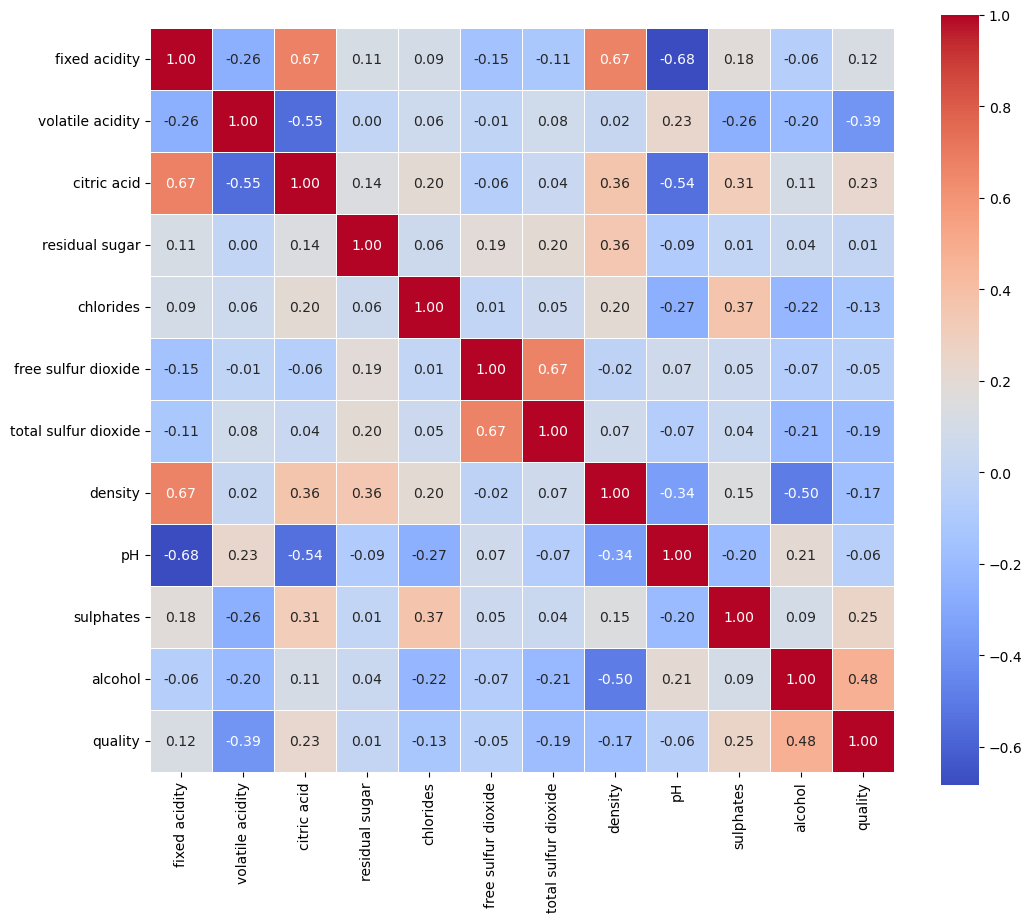

In [224]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",square=True,linewidths=.5)
plt.show()

In [225]:
df['good_quality'] = [1 if x >= 6 else 0 for x in df['quality']]

In [226]:
X_1 = df.drop('quality', axis=1) 
y_1 = df['quality']  

In [227]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_1, y_1, test_size=0.2, random_state=42)


In [228]:
scaler_reg = StandardScaler()
X_train_sc_reg = scaler_reg.fit_transform(X_train_reg)
X_test_sc_reg = scaler_reg.transform(X_test_reg)

In [229]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc_reg, y_train_reg)
pred_lin = lin_reg.predict(X_test_sc_reg)
mse_lin = mean_squared_error(y_test_reg, pred_lin)
r2_lin = r2_score(y_test_reg, pred_lin)
print(f" MSE: {mse_lin:.4f}, R2: {r2_lin:.4f}")

 MSE: 0.1548, R2: 0.7631


In [230]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_sc_reg, y_train_reg)
pred_ridge = ridge_reg.predict(X_test_sc_reg)
mse_ridge = mean_squared_error(y_test_reg, pred_ridge)
r2_ridge = r2_score(y_test_reg, pred_ridge)
print(f"Ridge MSE: {mse_ridge:.4f}, R2: {r2_ridge:.4f}")

Ridge MSE: 0.1548, R2: 0.7632


In [231]:
lasso_reg = Lasso(alpha=0.01, max_iter=10000)
lasso_reg.fit(X_train_sc_reg, y_train_reg)
pred_lasso = lasso_reg.predict(X_test_sc_reg)
mse_lasso = mean_squared_error(y_test_reg, pred_lasso)
r2_lasso = r2_score(y_test_reg, pred_lasso)
print(f"Lasso MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")

Lasso MSE: 0.1570, R2: 0.7597


In [232]:
X_2 = df.drop(['quality', 'good_quality'], axis=1) 
y_2 = df['good_quality']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [233]:
scaler = StandardScaler()
X_train_sc_2 = scaler.fit_transform(X_train_2)
X_test_sc_2 = scaler.transform(X_test_2)

In [234]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train_sc_2, y_train_2)
predictions_log_reg = log_reg_model.predict(X_test_sc_2)
print(f"Accuracy: {accuracy_score(y_test_2, predictions_log_reg):.4f}")

Accuracy: 0.7406


In [235]:
svm_model = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_sc_2, y_train_2)
y_pred_svm = svm_model.predict(X_test_sc_2)
print(f"SVS Accuracy: {accuracy_score(y_test_2, y_pred_svm):.4f}")


SVS Accuracy: 0.7281


In [236]:
class Svm:
    def __init__(self, lr=0.001, lambda_p=0.01, n=1000):
        self.lr = lr
        self.lambda_p = lambda_p
        self.n = n
        self.w = self.b = None
    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for _ in range(self.n):
            for i, x_i in enumerate(X):
                if y_[i] * (np.dot(x_i, self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * self.lambda_p * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_p * self.w - np.dot(x_i, y_[i]))
                    self.b -= self.lr * y_[i]
    def predict(self, X):
        return np.where(np.dot(X, self.w) - self.b >= 0, 1, 0)

In [237]:
model = Svm()
model.fit(X_train_sc_2, y_train_2)
y_pred = model.predict(X_test_sc_2)
accuracy_2 = accuracy_score(y_test_2, y_pred)
print(f"SVS Accuracy 2: {accuracy_2:.4f}")


SVS Accuracy 2: 0.7344
